In [2]:
import pandas as pd
import numpy as np
import librosa.display
import pretty_midi as pm
import copy
import matplotlib.pyplot as plt
import pandas as pd
import os
import dataset
# from dataset import plot_piano_roll
from pathlib import Path
from plotter import smooth
import time
import math
import ev_metrics
import pypianoroll
from pypianoroll import Multitrack, Track

C:\Users\Paolo\miniconda3\envs\tf_gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\Paolo\miniconda3\envs\tf_gpu\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [3]:
P = Path(os.path.abspath(''))  # Compatible with Jupyter Notebook

AssertionError: Breakpoint

In [3]:
def quantize(obj):
    """Quantize time axis."""
    PPQ = obj.resolution
    for instr in obj.instruments:
        for note in instr.notes:
            note.start = obj.time_to_tick(note.start)/PPQ
            note.end = obj.time_to_tick(note.end)/PPQ

    return obj

In [4]:
midi_object = pm.PrettyMIDI(str(P / "tests/1.mid"))
pr = midi_object.get_piano_roll(10)

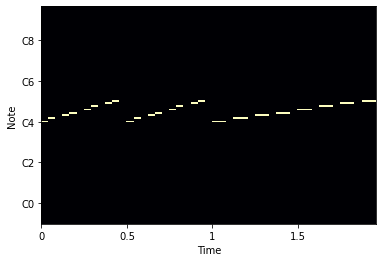

In [13]:
midi_object = pm.PrettyMIDI(str(P / "tests/1.mid"))
pr = midi_object.get_piano_roll(24)
librosa.display.specshow(pr[0:128], hop_length=1, sr=24,
                         x_axis='time', y_axis='cqt_note',
                         fmin=pm.note_number_to_hz(0))


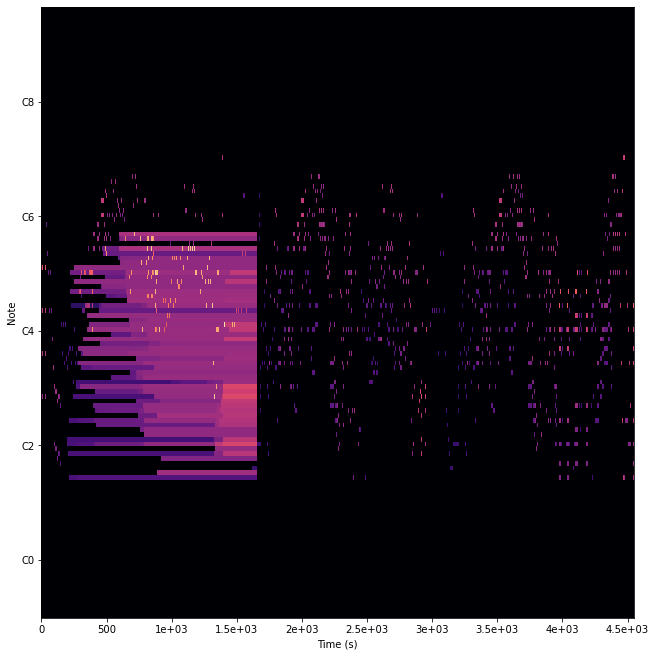

In [6]:
midi_object = quantize(pm.PrettyMIDI(str(P / "data/appass_3.mid")))
pr = midi_object.get_piano_roll(4)
fig, ax = plt.subplots(constrained_layout=True, figsize=(9, 9))
librosa.display.specshow(pr[0:128], hop_length=1, sr=1,
                         x_axis='s', y_axis='cqt_note',
                         fmin=pm.note_number_to_hz(0))


(4556, 128)


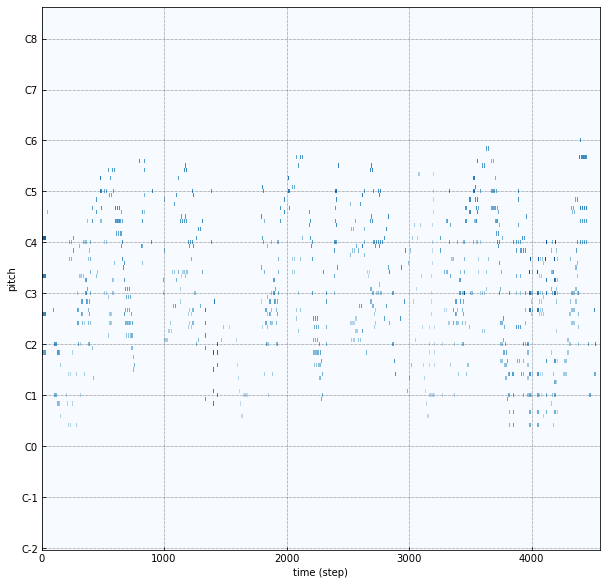

In [7]:
# midi_object = quantize(pm.PrettyMIDI(str(P / "base_7.mid")))
plt.rcParams["figure.figsize"] = (10, 10)
pr = pypianoroll.parse("data/appass_3.mid", beat_resolution=4, name='unknown')
# pr = midi_object.get_piano_roll(10)
# pianoroll = dataset.transpose(pr)
# track = Track(pianoroll=pr, program=0, is_drum=False)
# fig, ax = pr.plot()
fig, ax = plt.subplots()
pypianoroll.plot_pianoroll(ax, pr.get_merged_pianoroll())
print(pr.get_merged_pianoroll().shape)
plt.show()

(128, 4645)


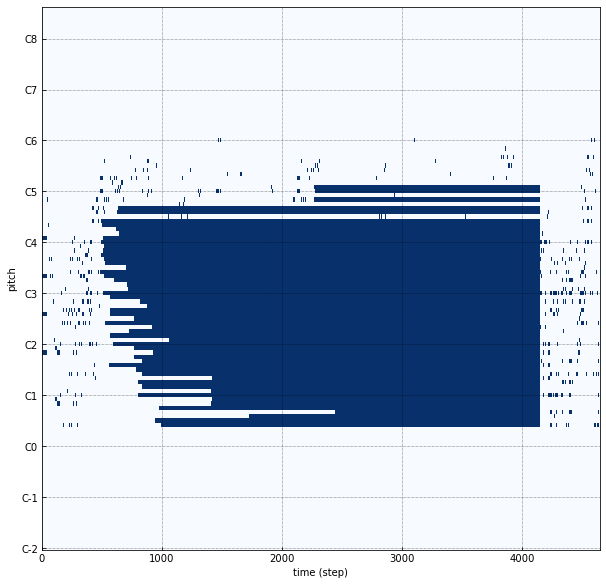

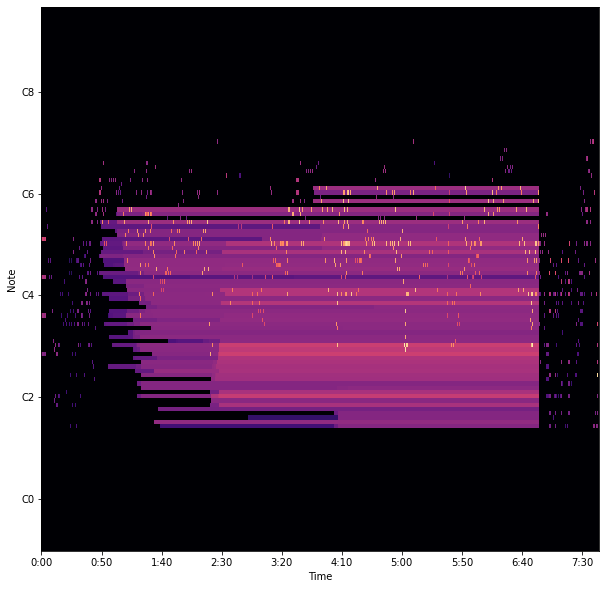

In [8]:
midi_object = pm.PrettyMIDI(str(P / "data/appass_3.mid"))
pr = midi_object.get_piano_roll(10)
fig, ax = plt.subplots()
print(pr.shape)
pypianoroll.plot_pianoroll(ax, dataset.transpose(pr))
fig, ax = plt.subplots()
librosa.display.specshow(pr, hop_length=1, sr=10,
                         x_axis='time', y_axis='cqt_note',
                         fmin=pm.note_number_to_hz(0))

(4556, 128)


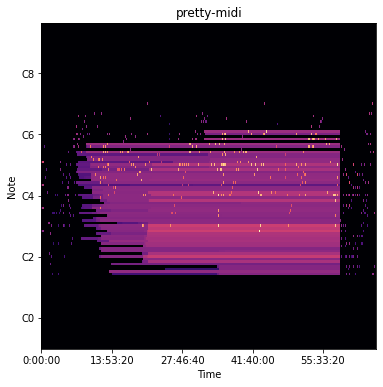

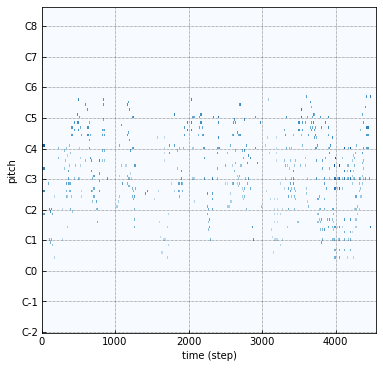

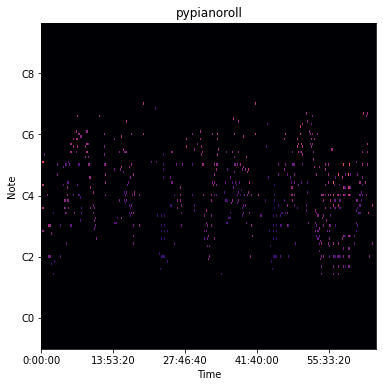

In [9]:
plt.rcParams["figure.figsize"] = (6, 6)
midi_object = pm.PrettyMIDI(str(P / "data/appass_3.mid"))


pr = midi_object.get_piano_roll(10)

librosa.display.specshow(pr[0:128], hop_length=512, sr=10,
                         x_axis='time', y_axis='cqt_note',
                         fmin=pm.note_number_to_hz(0))

plt.title('pretty-midi')
plt.savefig('piano1.png')

pr = pypianoroll.parse("data/appass_3.mid", beat_resolution=4, name='unknown')
# pr = midi_object.get_piano_roll(10)
# pianoroll = dataset.transpose(pr)
# track = Track(pianoroll=pr, program=0, is_drum=False)
# fig, ax = pr.plot()
fig, ax = plt.subplots()

pypianoroll.plot_pianoroll(ax, pr.get_merged_pianoroll())
print(pr.get_merged_pianoroll().shape)
plt.show()


fig, ax = plt.subplots()
plt.title('pypianoroll')
librosa.display.specshow(dataset.transpose(pr.get_merged_pianoroll()), hop_length=512, sr=10,
                         x_axis='time', y_axis='cqt_note',
                         fmin=pm.note_number_to_hz(0))
plt.savefig('piano2.png')

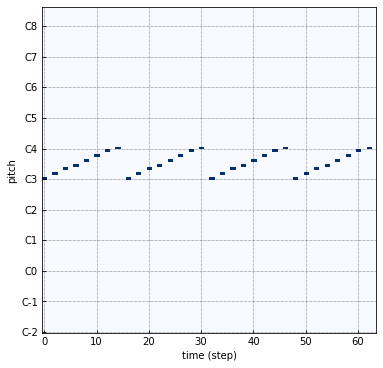

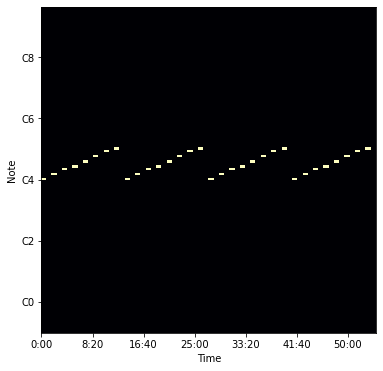

In [14]:
plt.rcParams["figure.figsize"] = (6, 6)
pr = pypianoroll.parse("tests/bis60.mid", beat_resolution=16, name='unknown')

pp = pr.get_merged_pianoroll()[:, 21:109]

# fig, ax = plt.subplots()
dataset.pyplot_piano_roll(pp)

fig, ax = plt.subplots()

pp = dataset.pad_piano_roll(pp)
librosa.display.specshow(dataset.transpose(pp), sr=10,
#                          fmin, fmax=88,
                         x_axis='time', y_axis='cqt_note',
                         fmin=pm.note_number_to_hz(0))


pp = dataset.transpose(pp)
# print(pd.DataFrame(pp)[30:50])

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1aee5741fc8>])

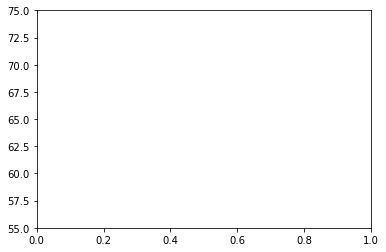

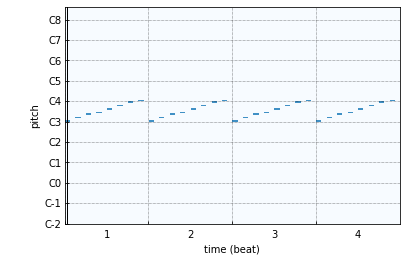

In [9]:
ppp = pypianoroll.parse(str(P / "tests/bis60.mid"), beat_resolution=16)
ppp.plot()